In [34]:
import numpy as np
import zeus
import h5py
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
%matplotlib inline

Chain Analysis: Reference
(1000, 6, 3)


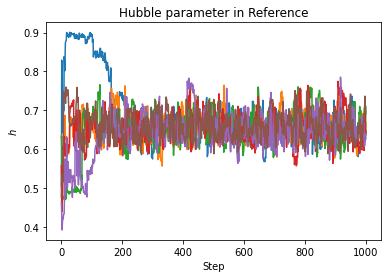

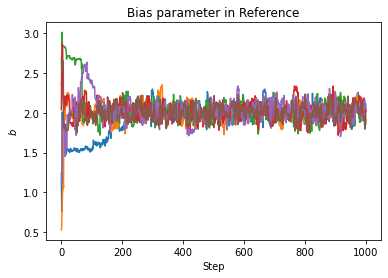

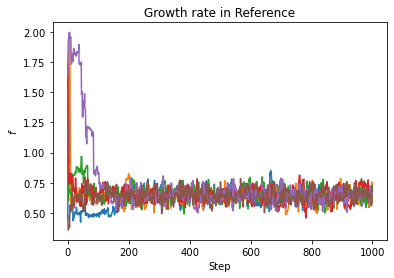

Integrated Autocorrelation Time
h: 7.252530998870014
b: 7.756057992961413
f: 5.35216635548776
Removed no burn in
Chain Analysis: Sample 100 (with Hartlap)
(1000, 6, 3)


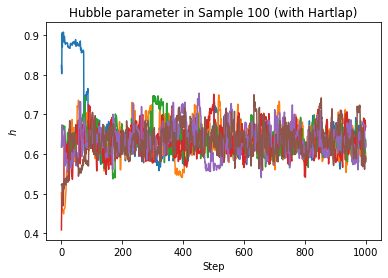

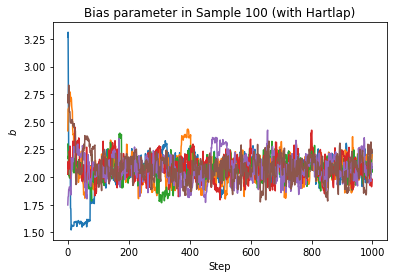

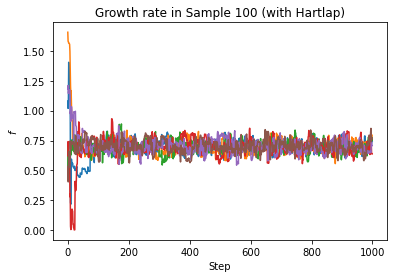

Integrated Autocorrelation Time
h: 10.985212392943454
b: 10.663313831911827
f: 9.389587277238835
Removed no burn in
Chain Analysis: NERCOME 100
(700, 6, 3)


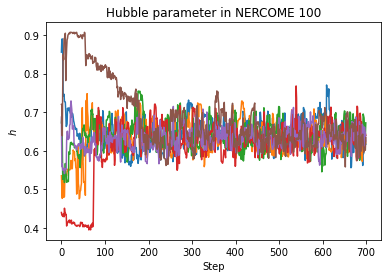

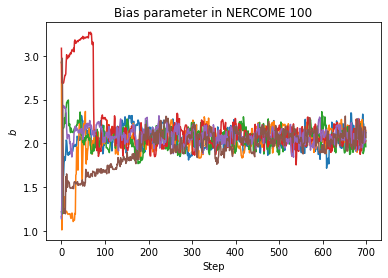

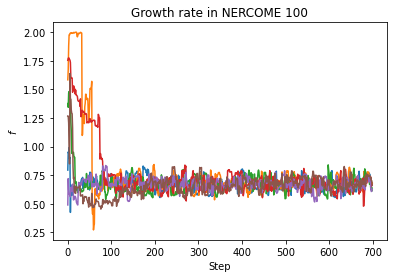

Integrated Autocorrelation Time
h: 7.560813998131902
b: 6.762829797700039
f: 6.083835322657541
Removed no burn in
Chain Analysis: Shrinkage 100
(1000, 6, 3)


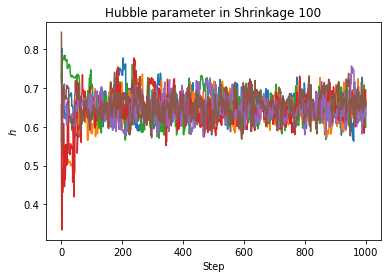

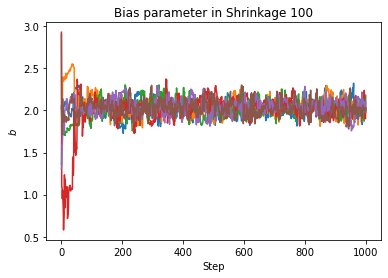

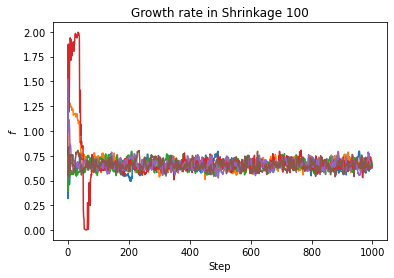

Integrated Autocorrelation Time
h: 12.841875961995038
b: 11.912654618323623
f: 9.742132572786502
Removed no burn in


In [40]:
chain_files = [
    "../output/chains/ref_chain.npy",
    "../output/chains/sample_100_chain.npy",
    "../output/chains/NERCOME_100_chain.h5",
    "../output/chains/shrinkage_100_chain.npy",
]
chain_names = [
    "Reference",
    "Sample 100 (with Hartlap)",
    "NERCOME 100",
    "Shrinkage 100",
]
nburn = [200, 100, 200, 100]

names = ["Hubble parameter", "Bias parameter", "Growth rate"]
labels = ["h", "b", "f"]

samples_list = []
for k in range(len(chain_files)):
    print("Chain Analysis: " + chain_names[k])
    
    if chain_files[k][-3:] == "npy":
        chain = np.load(chain_files[k])
    elif chain_files[k][-3:] == ".h5":
        chain_h5 = h5py.File(chain_files[k], 'r')
        chain = chain_h5["samples"]
    
    nsteps, nwalkers, ndim = chain.shape
    print(chain.shape)

    for i in range(ndim):
        for j in range(nwalkers):
            plt.plot(chain[:,j,i])
        plt.title(names[i] + " in " + chain_names[k])
        plt.xlabel("Step")
        plt.ylabel("$" + labels[i] + "$")
        plt.show()
    
    chain_trace = chain[nburn[k]:,:,:]
    IAT = zeus.AutoCorrTime(chain_trace)
    print("Integrated Autocorrelation Time")
    for i in range(ndim):
        print(labels[i] + ": " + str(IAT[i]))
    
    samples = MCSamples(samples=chain, labels=labels, names=names)
    samples.removeBurn(remove=nburn[k]/nsteps)
    samples_list.append(samples)

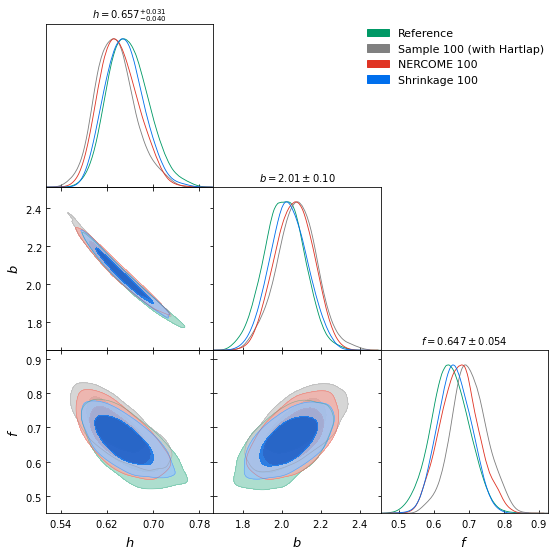

In [41]:
g = plots.getSubplotPlotter(subplot_size=3)
g.settings.figure_legend_frame = False
g.triangle_plot(samples_list, filled=True, contour_args={'alpha':0.8}, title_limit=1, legend_labels=chain_names)

In [32]:
for k in range(len(samples_list)):
    print(chain_names[k])
    samples = samples_list[k].samples
    nsamples, ndim = samples.shape
    for i in range(ndim):
        print(labels[i] + ": " + str(np.mean(samples[:,i])) + " ± " + str(np.std(samples[:,i])))

Reference
h: 0.6571782704936108 ± 0.03618384557744188
b: 2.013128358235214 ± 0.10343991318988444
f: 0.6466047400185299 ± 0.0544211293224558
Sample 40 (with Hartlap)
h: 0.6942585440641403 ± 0.043989606755965464
b: 1.9540914757495091 ± 0.11295934887323601
f: 0.6189405160372897 ± 0.06862298827706664
NERCOME 40
h: 0.6009796392709391 ± 0.03741056455073961
b: 2.1913758352758608 ± 0.12193606342138173
f: 0.7136634392418337 ± 0.08069125140215605
Shrinkage 40
h: 0.6688293037765457 ± 0.03441376419969582
b: 1.9858282184190776 ± 0.09667533259229756
f: 0.6408137274026804 ± 0.047602957221405576


In [42]:
g.export("../output/100_mocks_comparison.pdf")